In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
situational_file_path = "C:/Users/SAPTARSHI/Downloads/situational factors.xlsx" 
df_situational = pd.read_excel(situational_file_path)


In [6]:
# Define independent variables (X) and target variable (y)
X_situational = df_situational.drop(columns=["Have you ever crossed the street during a red light?"])
y_situational = df_situational["Have you ever crossed the street during a red light?"]

In [7]:
# Standardize continuous variables
scaler = StandardScaler()
X_situational_scaled = scaler.fit_transform(X_situational)

In [8]:
# Add constant for intercept
X_const_situational = sm.add_constant(X_situational_scaled)

In [10]:
# Split dataset into training and testing sets
X_train_sit, X_test_sit, y_train_sit, y_test_sit = train_test_split(
    X_const_situational, y_situational, test_size=0.2, random_state=42
)

In [12]:
# Train logistic regression model using statsmodels
logit_model_sit = sm.Logit(y_train_sit, X_train_sit)
result_sit = logit_model_sit.fit(disp=0)

In [13]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients_sit = result_sit.params
odds_ratios_sit = np.exp(coefficients_sit)
p_values_sit = result_sit.pvalues
conf_intervals_sit = result_sit.conf_int()
conf_intervals_sit.columns = ['2.5% CI', '97.5% CI']

In [14]:
# Create a DataFrame to display feature importance, odds ratios, p-values, and confidence intervals
importance_df_sit = pd.DataFrame(
    {
        "Feature": X_situational.columns.insert(0, 'Intercept'),
        "Coefficient": coefficients_sit,
        "Odds_Ratio": odds_ratios_sit,
        "P-Value": p_values_sit,
        "2.5% CI": conf_intervals_sit['2.5% CI'],
        "97.5% CI": conf_intervals_sit['97.5% CI']
    }
).sort_values(by="Odds_Ratio", ascending=False)

In [15]:
# Print feature importance, odds ratios, p-values, and confidence intervals
print("Feature Importance, Odds Ratios, P-Values, and Confidence Intervals:")
print(importance_df_sit)

Feature Importance, Odds Ratios, P-Values, and Confidence Intervals:
                                                 Feature  Coefficient  \
x2     What are the main reasons that make you more l...     0.829479   
x4     When do you believe red light violations are m...     0.378323   
x3     Do you believe that adding countdown timers to...     0.354630   
x5     Which type of vehicle is more likely to violat...     0.110700   
x6     Which type of intersections do you believe is ...    -0.278784   
x1     In which areas do you think red light violatio...    -1.045460   
const                                          Intercept    -1.651409   

       Odds_Ratio       P-Value   2.5% CI  97.5% CI  
x2       2.292124  1.339751e-12  0.600182  1.058776  
x4       1.459834  4.016552e-04  0.168800  0.587845  
x3       1.425652  1.309679e-03  0.138359  0.570900  
x5       1.117060  2.931255e-01 -0.095683  0.317082  
x6       0.756703  7.526402e-03 -0.483231 -0.074337  
x1       0.351530  1.6

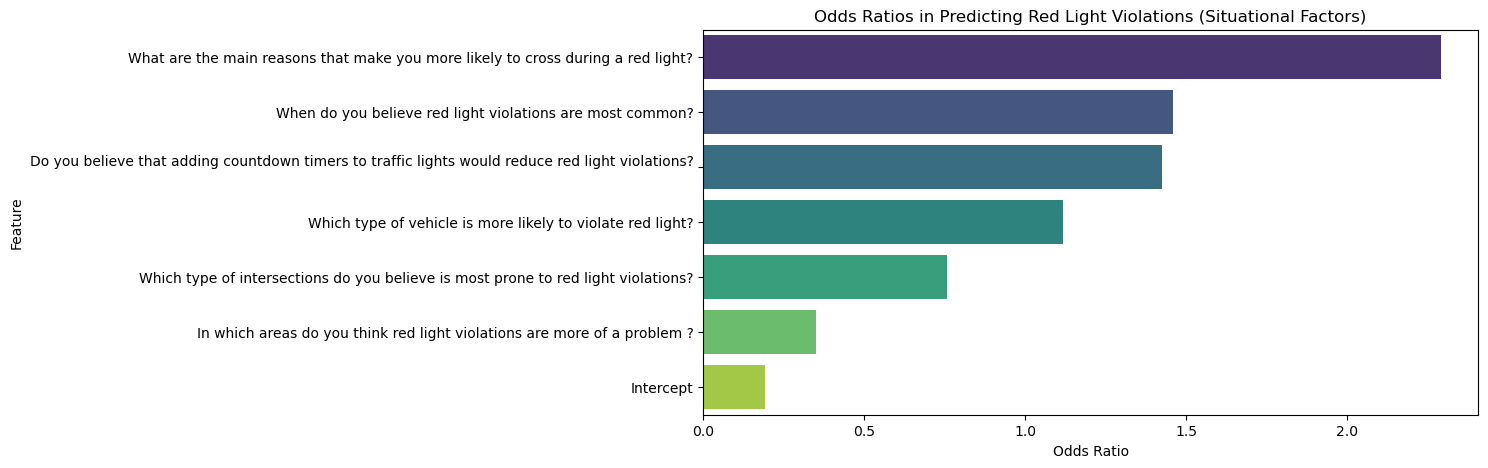

In [16]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_sit["Odds_Ratio"], y=importance_df_sit["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Situational Factors)")
plt.show()

In [7]:
# Get feature importance (coefficients)
feature_importance = log_reg_sit.coef_[0]

In [8]:
# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({"Feature": X_situational.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [9]:
# Print feature importance
print("Feature Importance Ranking:")
print(importance_df)

Feature Importance Ranking:
                                             Feature  Importance
1  What are the main reasons that make you more l...    0.816611
3  When do you believe red light violations are m...    0.371871
2  Do you believe that adding countdown timers to...    0.345419
4  Which type of vehicle is more likely to violat...    0.109336
5  Which type of intersections do you believe is ...   -0.274105
0  In which areas do you think red light violatio...   -1.014881


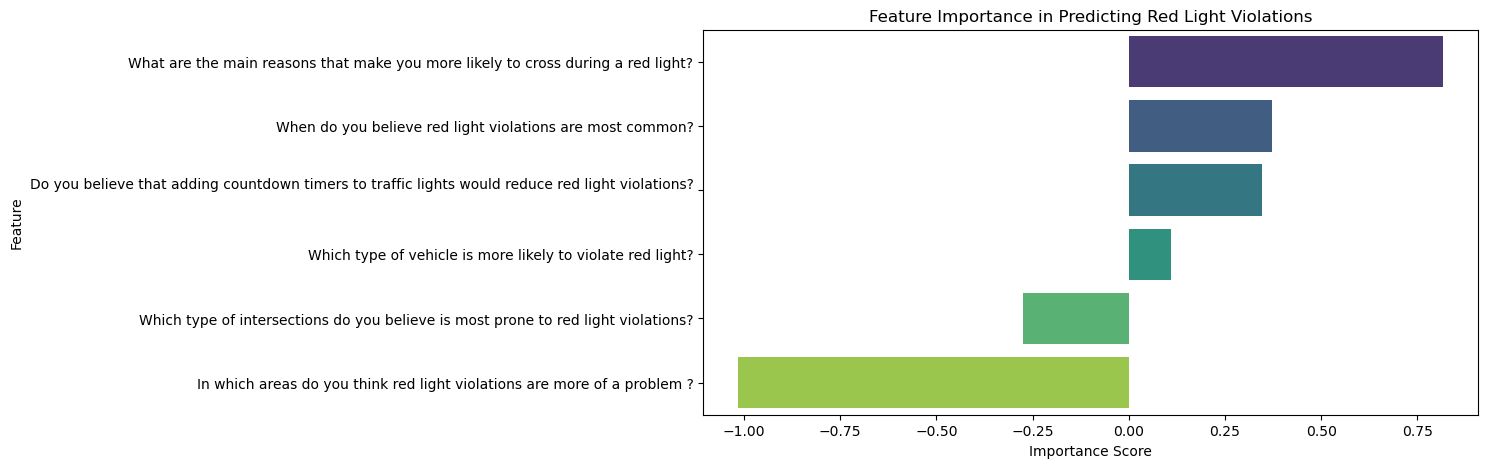

In [12]:
# Visualization of feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Red Light Violations")
plt.show()

In [10]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients_sit = log_reg_sit.coef_[0]
odds_ratios_sit = np.exp(coefficients_sit)

In [11]:
# Create a DataFrame to display feature importance and odds ratios
importance_df_sit = pd.DataFrame(
    {"Feature": X_situational.columns, "Coefficient": coefficients_sit, "Odds_Ratio": odds_ratios_sit}
).sort_values(by="Odds_Ratio", ascending=False)

In [13]:
# Print feature importance and odds ratios
print("Feature Importance and Odds Ratios:")
print(importance_df_sit)

Feature Importance and Odds Ratios:
                                             Feature  Coefficient  Odds_Ratio
1  What are the main reasons that make you more l...     0.816611    2.262819
3  When do you believe red light violations are m...     0.371871    1.450447
2  Do you believe that adding countdown timers to...     0.345419    1.412581
4  Which type of vehicle is more likely to violat...     0.109336    1.115537
5  Which type of intersections do you believe is ...    -0.274105    0.760252
0  In which areas do you think red light violatio...    -1.014881    0.362446


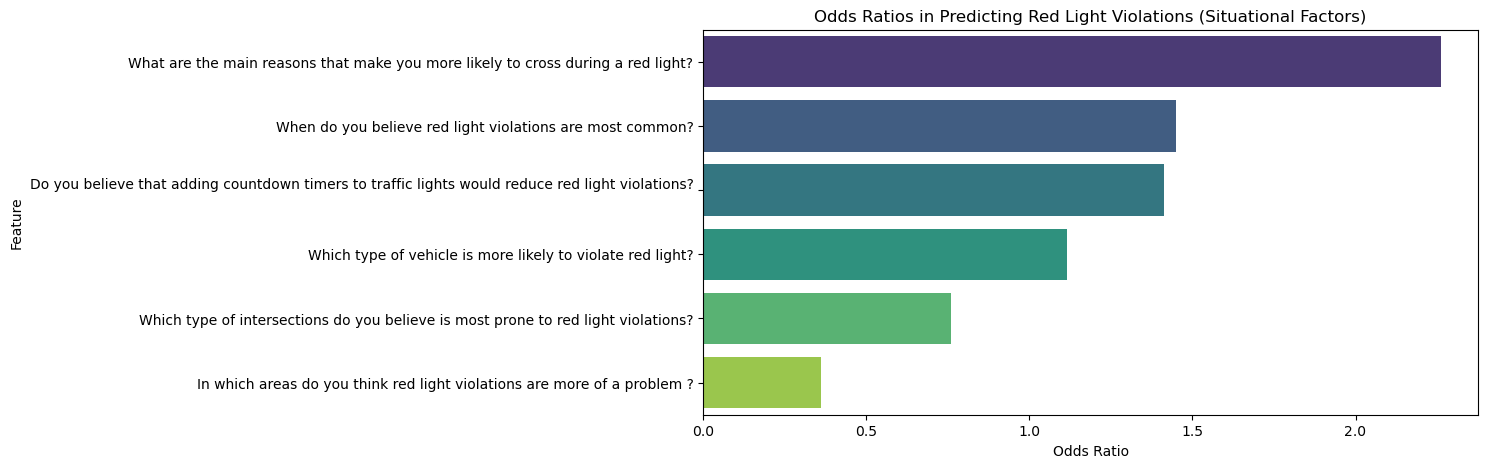

In [14]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_sit["Odds_Ratio"], y=importance_df_sit["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Situational Factors)")
plt.show()
